# Digital House - Trabajo Práctico Nº1
## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades
Grupo Nª2
Alumnos:
* Alberto Paparelli
* André Song
* Marianela Riz
* Gloria Caravajal
* Franco Emanuel Rodriguez
* Iván Axel Schweizer

Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

In [85]:
# Lo primero que hacemos es importar todas las librerias necesarias.
import pandas as pd
import numpy as np
import re 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [86]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../dataset/properati.csv"
data = pd.read_csv(filename)
display(data.sample(n=6)) 
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
95024,95024,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bgie_venta_depart...,Sergio Villella presenta departamentos en vent...,Departamento - Nueva Cordoba,https://thumbs4.properati.com/8/aFSgkXKj2fuVz7...
107651,107651,sell,house,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,...,341.0,2052.785924,2052.785924,NaN,NaN,NaN,http://www.properati.com.ar/1byiv_venta_casa_s...,"Muy linda casa en muy buen estado, en esquina...",Casa - San Isidro,https://thumbs4.properati.com/9/39cKvZrbahfVwE...
80956,80956,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4137514,-64.1659793",-31.413751,...,NaN,1542.301042,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1axfh_venta_depart...,NUEVAS RAICES vende departamento de verdadera ...,B° GRAL PAZ excelente ubicación de 1° calidad ...,https://thumbs4.properati.com/8/4ZzQY5Cz87a9_q...
58523,58523,sell,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.561963,-58.721582",-34.561963,...,20.0,NaN,17500.000000,NaN,5.0,NaN,http://www.properati.com.ar/19vme_venta_casa_s...,Corredor Responsable: Jorge Roca - CMCPSM 2550...,"Inmaculada casa B° cdo ""El Pato Verde"" 1025 m2...",https://thumbs4.properati.com/6/PU5UZeMouAmdH5...
108722,108722,sell,apartment,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Morón|,Argentina,Bs.As. G.B.A. Zona Oeste,3430544.0,NaN,NaN,...,89.0,2424.242424,2696.629213,NaN,NaN,NaN,http://www.properati.com.ar/1c1bf_venta_depart...,El edificio se ubica en una situación urbana ...,Departamento - Moron,https://thumbs4.properati.com/7/78ThIAZoxUJF72...
76132,76132,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4235326,-58.5903044",-34.423533,...,50.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ar78_venta_depart...,Departamento 58m² con Sala de juegos en Avenid...,Departamento en Tigre,https://thumbs4.properati.com/4/9EDr__7JoEXNRh...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


# Acerca del data properati.csv
- Cantidad de nulos por columnas
- Porcentaje de nulos por columnas 
- Informacion del data (info)
- Detalle (describe)
- 

In [87]:
#1ero: Intentar rellenar las columnas lo mas que se pueda con info del mismo data o internet
#2do: eliminar posibles duplicados
#3ero: mandar columnas que queremos eliminar a futuro a una nueva lista

#COLUMNAS MARU:
#Rellenar geonames_id con lat, lon, dsp eliminamos estas de lat y lon y me quedo con la grupal que es lat-lon.
#Rellenar Floor y Room 

In [88]:
data.apply(lambda x: sum(x.isnull()),axis=0)  #nulos x columna

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Porcentaje de nulos por columnas:

In [89]:
data.isnull().mean()*100    #%nulos x columna

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


Informacion

In [90]:
data.info()   #info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

Detalle

In [91]:
data.describe()  #detalle data

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [92]:
data_property=data["property_type"].value_counts()   #cant segun tipo de propiedad
print(data_property) 

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


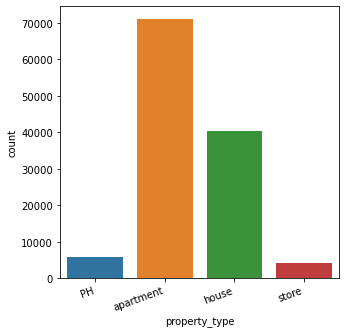

In [93]:
plt.figure(figsize=(5,5)) #tamaño barras
ax = sns.countplot(data=data, x= "property_type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")  #Buscar que era rotation =50 o 20
plt.show()

# Analisis Price
Precio original del aviso

In [94]:
price_=data["price"].value_counts()   #cant segun $
print(price_) 

120000.0     1667
130000.0     1462
150000.0     1404
110000.0     1335
85000.0      1304
             ... 
139300.0        1
1354725.0       1
1451275.0       1
1779000.0       1
4397072.0       1
Name: price, Length: 9746, dtype: int64


Detalle

In [83]:
data.currency.describe()

count     100809
unique         4
top          USD
freq       87587
Name: currency, dtype: object

Cantidad de nulos y valores unicos

In [84]:
print(f'Cantidad de registros con NaN: {data.price.isnull().sum()}') #valores nulos
print(f'Porcentaje de registros con NaN: {data.price.isnull().mean()*100}')
print(f'Cantidad de registros sin NaN: {data.price.notnull().sum()}')  #valores sin nulos

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Cantidad de registros sin NaN: 100810


Eliminar duplicados por similitud de descripcion y obtendremos una disminucion en price y currency de 16.83% de nulos a 15.35%

# Analisis Currency
Moneda original del aviso

In [95]:
currency_=data["currency"].value_counts()   #cant segun tipo de moneda
print(currency_) 

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


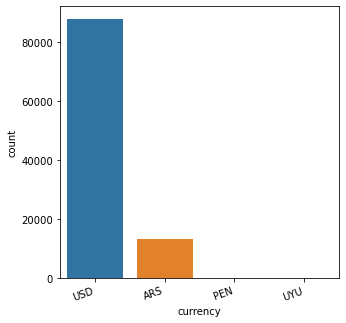

In [96]:
plt.figure(figsize=(5,5)) #tamaño barras
ax = sns.countplot(data=data, x= "currency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")  #Buscar que era rotation =50 o 20
plt.show()

Detalle

In [97]:
data.currency.describe()

count     100809
unique         4
top          USD
freq       87587
Name: currency, dtype: object

Cantidad de nulos y valores unicos

In [98]:
print(f'Cantidad de registros con NaN: {data.currency.isnull().sum()}') #valores nulos
print(f'Porcentaje de registros con NaN: {data.currency.isnull().mean()*100}')
print(f'Cantidad de registros sin NaN: {data.currency.notnull().sum()}')  #valores sin nulos

Cantidad de registros con NaN: 20411
Porcentaje de registros con NaN: 16.83798053126547
Cantidad de registros sin NaN: 100809


# Analisis Floor

La columna Floor tiene 113321 valores nulos, es decir un 93.48%.
Consideramos que no es una variable relevante en el presente trabajo. La misma presenta una gran cantidad de datos faltantes. 


Detalle

In [99]:
data.floor.describe()

count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64

Cantidad de nulos y valores unicos

In [100]:
print(f'Cantidad de registros con NaN: {data.floor.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.floor.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['floor']).size().reset_index(name='count'))

Cantidad de registros con NaN: 113321
Porcentaje de registros con NaN: 93.48374855634384
Contamos cantidad de registros unicos:
      floor  count
0       1.0   2080
1       2.0   1542
2       3.0    914
3       4.0    658
4       5.0    484
..      ...    ...
177  1609.0      4
178  2103.0      1
179  2177.0      1
180  2509.0      1
181  3150.0      1

[182 rows x 2 columns]


# Analisis Rooms

In [101]:
data.rooms.describe()

count    47390.000000
mean         3.080840
std          1.860773
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: rooms, dtype: float64

Cantidad de nulos y valores unicos

In [102]:
print(f'Cantidad de registros con NaN: {data.rooms.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.rooms.isnull().mean()*100}')
print(f'Cantidad de registros sin NaN: {data.rooms.notnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['rooms']).size().reset_index(name='count')) #Cantidad de registros por cantidad de habitacion


Cantidad de registros con NaN: 73830
Porcentaje de registros con NaN: 60.90579112357697
Cantidad de registros sin NaN: 47390
Contamos cantidad de registros unicos:
    rooms  count
0     1.0   7377
1     2.0  12433
2     3.0  12567
3     4.0   7937
4     5.0   3782
5     6.0   1403
6     7.0    770
7     8.0    409
8     9.0    184
9    10.0    226
10   11.0     72
11   12.0     65
12   13.0     33
13   14.0     27
14   15.0     26
15   16.0     11
16   17.0     16
17   18.0      6
18   19.0      4
19   20.0     11
20   21.0      5
21   22.0      8
22   23.0      2
23   24.0      1
24   25.0      4
25   27.0      1
26   28.0      1
27   29.0      1
28   30.0      4
29   31.0      1
30   32.0      3


In [103]:
############ RELLENAR ROOMS ###############
#1- Busco en title el patron: cantidad de ambientes de 0 a +9, y la palabra amb o Amb o AMB o 2 a o 2 A
#2- Coloco el valor encontrado en columna que quiero rellenar (rooms) 
#3- Imprimo cantidad de nulos actual 

#4- Coloco "No encontrado" en los vacios o dejamos vacio como nulo ???? 


#5- Comparo el antes de nulos vs el desp
#https://www.youtube.com/watch?v=zwQBDhQ_PEI

La columna rooms inicialmente contaba con un 60.90% (73830) de valores nulos. Decidimos verificar si en las columnas title y description habia algun detalle de interes para rellenar la misma, por lo que realizamos un regex y encontramos algunas coincidencias. Logramos recuperar datos y ahora tenemos un 20.60% (24979) de valores nulos. 


% de nulos luego de rellenar rooms

In [104]:
##############  En patron habria que agregar los numeros del 0 al 9 con sus letras y DOR #################
##########################################################################################################

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]+)\s?amb|DOS'

regex = re.compile(patron, flags = re.IGNORECASE)
rooms_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['rooms'].fillna(rooms_titulo, inplace=True)
rooms_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['rooms'].fillna(rooms_descripcion, inplace=True)
print(data.isnull().mean()*100)


Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         20.606336
expenses                      88.234615
properati_url                  0.000000
description                    0.000000
title                          0.000000


Cantidad de valores luego de rellenar rooms

In [105]:
print(data.isnull().sum())

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          24979
expenses                      106958
properati_url                      0
description                        0
title                              0
image_thumbnail                 3112
dtype: int64


In [106]:
data.head(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,2,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,2,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,3,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,2,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


# Eliminar duplicados completos o parcial

In [107]:
#eliminar duplicados

data[ data.duplicated(keep='last') ]

data.drop_duplicates(keep='last', inplace=True)

data.drop(['floor'], axis=1, inplace=True)

#eliminar duplicado parcial
data = data.sort_values(['title', 'description'], ascending=True)

data[ ( data.property_type == 'PH' ) & (data.duplicated(['title', 'description','rooms'], keep=False)) ]
data[ ( data.property_type == 'house' ) & (data.duplicated(['title', 'description', 'rooms'], keep=False)) ]
data[ ( data.property_type == 'store' ) & (data.duplicated(['title', 'description', 'rooms'], keep=False)) ]
data[ ( data.property_type == 'apartment' ) & (data.duplicated(['title', 'description','rooms'], keep=False)) ]

data.drop_duplicates(['title', 'description', 'rooms'], keep='last', inplace=True)